In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Часть А

In [48]:
U0 = 3.04 # Вт
R = 10000 # Ом

# kHz - амплитуда в делениях сетки
ampl_freq_pq_p0 = np.array( [[5 , 0.8],
                             [10, 1.65],
                             [15, 2.5],
                             [20, 3.5]])

ampl_freq_p0_pq = np.array( [[5 , 0.8],
                             [10, 1.7],
                             [15, 2.5],
                             [20, 3.5]])


In [4]:
measures = pd.DataFrame(data=ampl_freq_pq_p0, 
                        columns=[r"Частота, кГц", 
                                 r"Амплитуда(в делениях сетки)"])
print("PQ / P0")
measures

PQ / P0


,"Частота, кГц",Амплитуда(в делениях сетки)
0,5.0,0.80
1,10.0,1.65
2,15.0,2.50
3,20.0,3.50


In [5]:
measures = pd.DataFrame(data=ampl_freq_p0_pq, 
                        columns=[r"Частота, кГц", 
                                 r"Амплитуда(в делениях сетки)"])
print("P0 / PQ")

measures

P0 / PQ


,"Частота, кГц",Амплитуда(в делениях сетки)
0,5.0,0.8
1,10.0,1.7
2,15.0,2.5
3,20.0,3.5


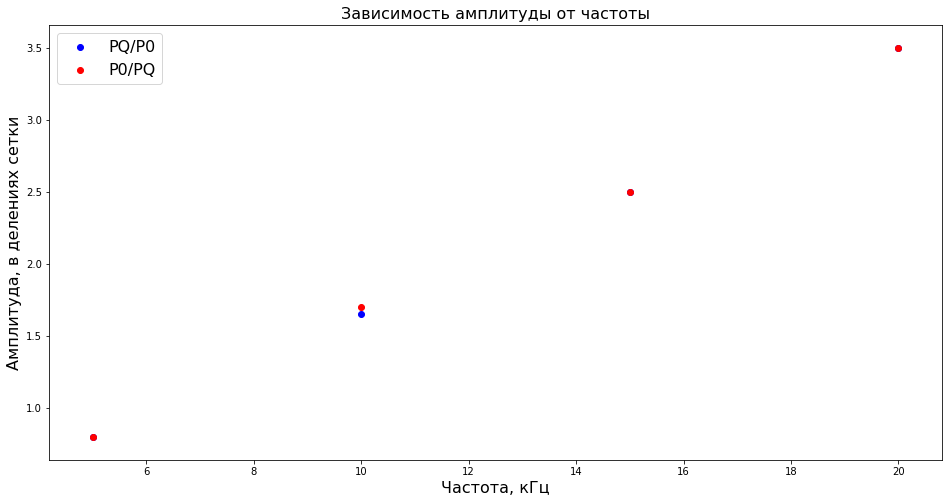

In [47]:
plt.figure(figsize=(16, 8))

plt.scatter(ampl_freq_pq_p0[:, 0], ampl_freq_pq_p0[:, 1], color='b', label="PQ/P0")
plt.scatter(ampl_freq_p0_pq[:, 0], ampl_freq_p0_pq[:, 1], color='r', label="P0/PQ")

plt.title("Зависимость амплитуды от частоты", fontsize=16)
plt.xlabel("Частота, кГц", fontsize=16)
plt.ylabel("Амплитуда, в делениях сетки", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

## Часть Б

$$
    M_{ij} = \frac{\varepsilon_{ij}R}{2 \pi f U_0}
$$
$f$ -- частота в Гц, $R$ - сопротивление, $\varepsilon_{ij}$ - амплитуда ЭДС

In [96]:
eds_ampl_sigma = 0.1

def getM(eds_ampl, R, f, U0):
    return eds_ampl * R / (2 * np.pi * f * U0)

def getMsigma(eds_ampl, R, f, U0):
    return eds_ampl_sigma * getM(eds_ampl, R, f, U0)

In [97]:

# амплитуда от расстояния между катушками(в миллиметрах)
# M21
ampl_dist_21 = np.array([[0 , 2.2],
                         [10, 3.5],
                         [20, 4.5],
                         [30, 5  ],
                         [40, 5.3],
                         [50, 5.2],
                         [60, 5  ],
                         [70, 4.8],
                         [80, 4.4],
                         [90, 3.7],
                         [100,2.2]])

# амплитуда от расстояния между катушками(в ячейках)
# M12
ampl_dist_12 = np.array([[0 , 2.6],
                         [10, 4   ],
                         [20, 4.9 ],
                         [30, 5.4 ],
                         [40, 5.6 ],
                         [50, 5.6 ],
                         [60, 5.6 ],
                         [70, 5.1 ],
                         [80, 5   ],
                         [90, 4.3 ],
                         [100,2.5 ]])


In [98]:
f = 15000
M21 = getM(ampl_dist_21[:, 1], R, f, U0)
M12 = getM(ampl_dist_12[:, 1], R, f, U0)

M21 = np.reshape(M21, (len(M21), 1))
M12 = np.reshape(M12, (len(M12), 1))

for i in range(len(M21)):
    M21[i][0] = round(M21[i][0], 2)
    M12[i][0] = round(M12[i][0], 2)

In [99]:
measures = pd.DataFrame(data=np.hstack((ampl_dist_21, M21, ampl_dist_12, M12)), 
                        columns=[r"Расстояние между катушками 1-2, мм", 
                                 r"Амплитуда ЭДС индукции(в делениях сетки) 1-2",
                                 r"Коэффициент взаимоиндукции 1-2",
                                 r"Расстояние между катушками 2-1, мм", 
                                 r"Амплитуда ЭДС индукции(в делениях сетки) 2-1",
                                 r"Коэффициент взаимоиндукции 2-1"])
measures

,"Расстояние между катушками 1-2, мм",Амплитуда ЭДС индукции(в делениях сетки) 1-2,Коэффициент взаимоиндукции 1-2,"Расстояние между катушками 2-1, мм",Амплитуда ЭДС индукции(в делениях сетки) 2-1,Коэффициент взаимоиндукции 2-1
0,0.0,2.2,0.08,0.0,2.6,0.09
1,10.0,3.5,0.12,10.0,4.0,0.14
2,20.0,4.5,0.16,20.0,4.9,0.17
3,30.0,5.0,0.17,30.0,5.4,0.19
4,40.0,5.3,0.18,40.0,5.6,0.20
5,50.0,5.2,0.18,50.0,5.6,0.20
6,60.0,5.0,0.17,60.0,5.6,0.20
7,70.0,4.8,0.17,70.0,5.1,0.18
8,80.0,4.4,0.15,80.0,5.0,0.17
9,90.0,3.7,0.13,90.0,4.3,0.15


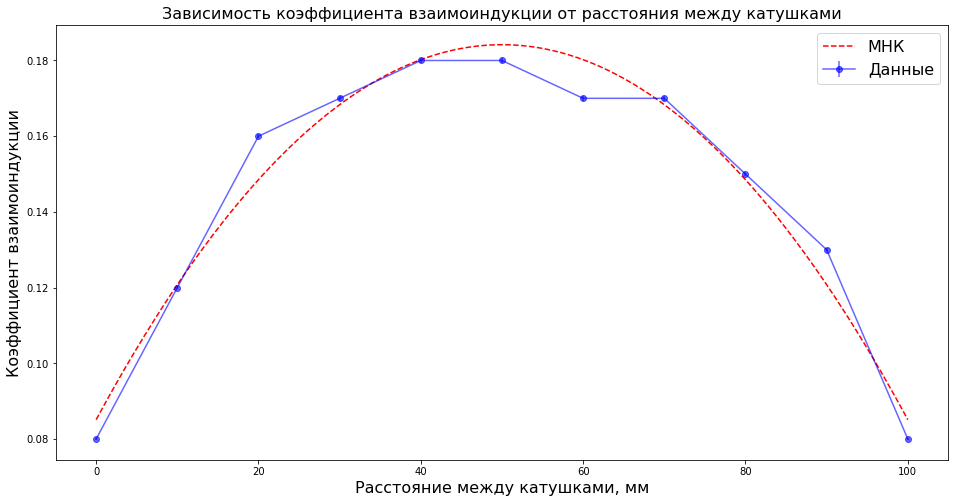

In [104]:
plt.figure(figsize=(16, 8))

x1, y1 = ampl_dist_21[:, 0], np.reshape(M21, (1, len(M21)))[0]
x2, y2 = ampl_dist_12[:, 0], np.reshape(M12, (1, len(M12)))[0]

p1 = np.poly1d(np.polyfit(x1, y1, 2))
p2 = np.poly1d(np.polyfit(x2, y2, 2))

grid = np.linspace(min(np.min(x1), np.min(x2)), max(np.max(x1), np.max(x2)), 500)

plt.errorbar(x1, y1, yerr=getMsigma(y1, R, f, U0), label='Данные', color='b', alpha=0.6, marker='o')
# plt.errorbar(x2, y2, yerr=getMsigma(y2, R, f, U0), label='M12', color='b', alpha=0.6, marker='o')
plt.plot(grid, p1(grid), ls='--', label="МНК", color='r')
# plt.plot(grid, p2(grid), ls='--', label="МНК-12", color='b')

plt.title("Зависимость коэффициента взаимоиндукции от расстояния между катушками", fontsize=16)
plt.xlabel("Расстояние между катушками, мм", fontsize=16)
plt.ylabel("Коэффициент взаимоиндукции", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

## Часть В

In [191]:
# первые 3 измерения сделали с масштабом 20, а не 50
# z = 50мм
ampl_u = np.array([[0.9082, 4.2 * 0.4],
                   [1.309 , 2.4 ],
                   [1.7   , 3.105 ],
                   [2.106 , 3.9 ],
                   [2.492 , 4.6 ],
                   [2.907 , 5.35],
                   [3.300 , 6.1   ],
                   [3.713 , 6.8 ],
                   [4.1   , 7.5 ],
                   [4.6   , 8.54 ]])


In [192]:
M21 = np.array([round(x, 3) for x in getM(ampl_u[:, 1], R, f, ampl_u[:, 0])])

In [193]:
measures = pd.DataFrame(data=np.hstack((ampl_u, np.reshape(M21, (len(M21), 1)))), 
                        columns=[r"Напряжение, В", 
                                 r"Амплитуда(в делениях сетки)",
                                 r"Коэффициент взаимоиндукции"])
print("z=50мм")
measures

z=50мм


,"Напряжение, В",Амплитуда(в делениях сетки),Коэффициент взаимоиндукции
0,0.9082,1.680,0.196
1,1.3090,2.400,0.195
2,1.7000,3.105,0.194
3,2.1060,3.900,0.196
4,2.4920,4.600,0.196
5,2.9070,5.350,0.195
6,3.3000,6.100,0.196
7,3.7130,6.800,0.194
8,4.1000,7.500,0.194
9,4.6000,8.540,0.197


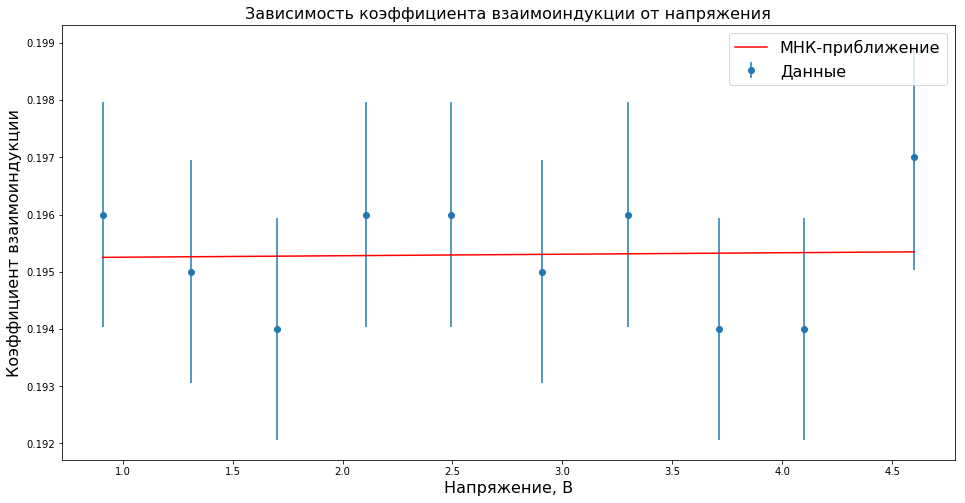

In [194]:
x = ampl_u[:, 0]
y = M21

plt.figure(figsize=(16, 8))

k, b = np.polyfit(x, y, 1)
plt.errorbar(x, y, yerr=0.01 * y, label='Данные', fmt='o')

grid = np.linspace(np.min(x), np.max(x), 500)
plt.plot(grid, k * grid + b, color='r', label='МНК-приближение')

plt.title("Зависимость коэффициента взаимоиндукции от напряжения", fontsize=16)
plt.xlabel("Напряжение, В", fontsize=16)
plt.ylabel("Коэффициент взаимоиндукции", fontsize=16)

plt.legend(loc='best', fontsize=16)
plt.show()

## Часть Г

In [213]:
U0 = 3
ampl_freq = np.array([[ 5, 0.8],
                      [ 8, 1.2],
                      [ 9, 1.3],
                      [10, 1.5],
                      [16, 5.9],
                      [20, 7.6]])
f = np.array([
5000,
8000,
9000,
10000,
11000,
12000,
14000,
15000,
16000,
17000,
18000,
20000,
21000,
22000,
23000,
24000]) / 1000

ampl = np.array(list(map(float,
"""0.8
1.2
1.3
1.5
1.7
1.9
2.1
2.4
2.5
2.8
2.9
3.2
3.5
3.6
4.0
4.0""".split('\n'))))

ampl_freq = np.vstack((f, ampl)).T
ampl_freq

array([[  5. ,   0.8],
       [  8. ,   1.2],
       [  9. ,   1.3],
       [ 10. ,   1.5],
       [ 11. ,   1.7],
       [ 12. ,   1.9],
       [ 14. ,   2.1],
       [ 15. ,   2.4],
       [ 16. ,   2.5],
       [ 17. ,   2.8],
       [ 18. ,   2.9],
       [ 20. ,   3.2],
       [ 21. ,   3.5],
       [ 22. ,   3.6],
       [ 23. ,   4. ],
       [ 24. ,   4. ]])

In [216]:
M = getM(ampl, R, f, U0)

In [217]:
measures = pd.DataFrame(data=np.hstack((ampl_freq, 
                                        np.reshape(M, (len(M), 1)), 
                                        np.reshape(1/ampl_freq[:, 0], (len(M), 1)))),
                        columns=[r"Частота, кГц", 
                                 r"Амплитуда(в делениях сетки)",
                                 r"Коэффициент взаимоиндукции",
                                 r"$\frac{1}{f}$"])
measures

,"Частота, кГц",Амплитуда(в делениях сетки),Коэффициент взаимоиндукции,$\frac{1}{f}$
0,5.0,0.8,84.882636,0.200000
1,8.0,1.2,79.577472,0.125000
2,9.0,1.3,76.630158,0.111111
3,10.0,1.5,79.577472,0.100000
4,11.0,1.7,81.988910,0.090909
5,12.0,1.9,83.998442,0.083333
6,14.0,2.1,79.577472,0.071429
7,15.0,2.4,84.882636,0.066667
8,16.0,2.5,82.893200,0.062500
9,17.0,2.8,87.379184,0.058824


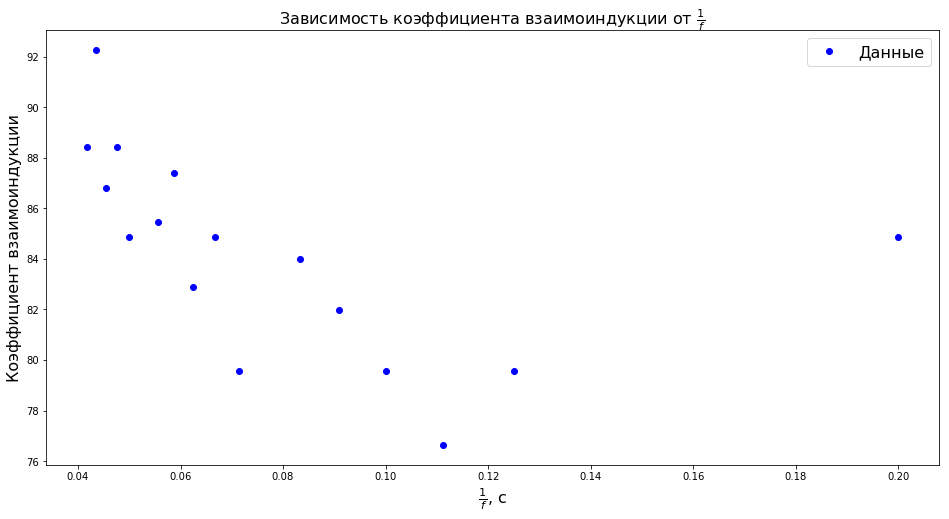

In [227]:
x = 1 / ampl_freq[:, 0]
y = M

k, b = np.polyfit(x, y, 1)

plt.figure(figsize=(16, 8))
grid = np.linspace(np.min(x), np.max(x), 500)
plt.errorbar(x, y, label="Данные", fmt='o', color='blue')
plt.xlabel(r"$\frac{1}{f}$, с",fontsize=16)
plt.ylabel(r"Коэффициент взаимоиндукции",fontsize=16)
plt.title(r"Зависимость коэффициента взаимоиндукции от $\frac{1}{f}$",fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()